In [7]:
library('tidyverse')
chocolate = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv') |> 
    mutate(cocoa_percent = str_replace(cocoa_percent, '%', '') |> as.numeric())

Rows: 2530 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): company_manufacturer, company_location, country_of_bean_origin, spe...
dbl (3): ref, review_date, rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
top10choc = chocolate |>
    group_by(country_of_bean_origin) |>
    summarize(count=n()) |>
    slice_max(order_by = count, n = 10) |>
    arrange(desc(count))
top10choc

country_of_bean_origin,count
<chr>,<int>
Venezuela,253
Peru,244
Dominican Republic,226
Ecuador,219
Madagascar,177
Blend,156
Nicaragua,100
Bolivia,80
Colombia,79


[1] "Venezuela"          "Peru"               "Dominican Republic"
[4] "Ecuador"            "Madagascar"         "Blend"             
[7] "Nicaragua"          "Bolivia"

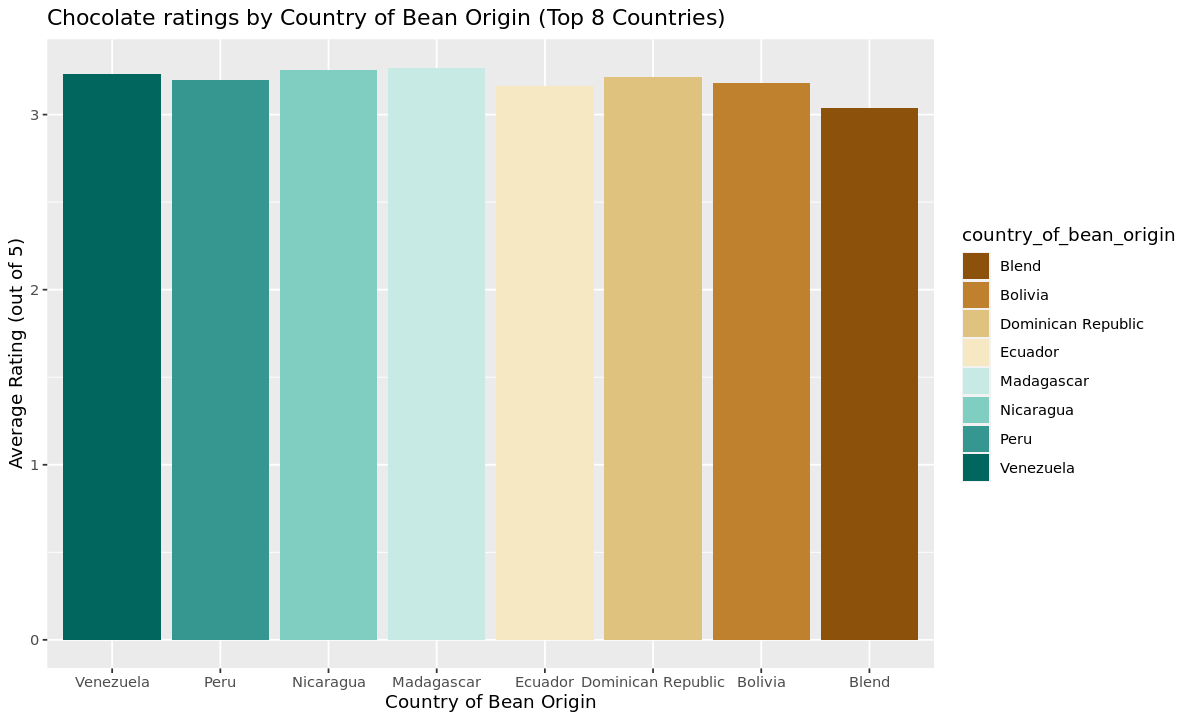

In [30]:
top8choc = chocolate |>
    group_by(country_of_bean_origin) |>
    summarize(count=n()) |>
    slice_max(order_by = count, n = 8) |>
    pull(country_of_bean_origin)
top8choc 

choc = chocolate |>
    filter(country_of_bean_origin %in% top8choc) |>
    group_by(country_of_bean_origin) |>
    summarize(rating_avg = sum(rating, na.rm=TRUE)/n())

options(repr.plot.width = 10, repr.plot.height=6)
p = ggplot(choc, aes(y= country_of_bean_origin |> fct_rev(), x=rating_avg, , fill=country_of_bean_origin)) + geom_col() +
    labs(y= 'Country of Bean Origin', x = "Average Rating (out of 5)", title = 'Chocolate ratings by Country of Bean Origin (Top 8 Countries)') +
    coord_flip() + scale_fill_brewer(palette = "BrBG") 
p


[1] "Venezuela"          "Peru"               "Dominican Republic"
[4] "Ecuador"            "Madagascar"

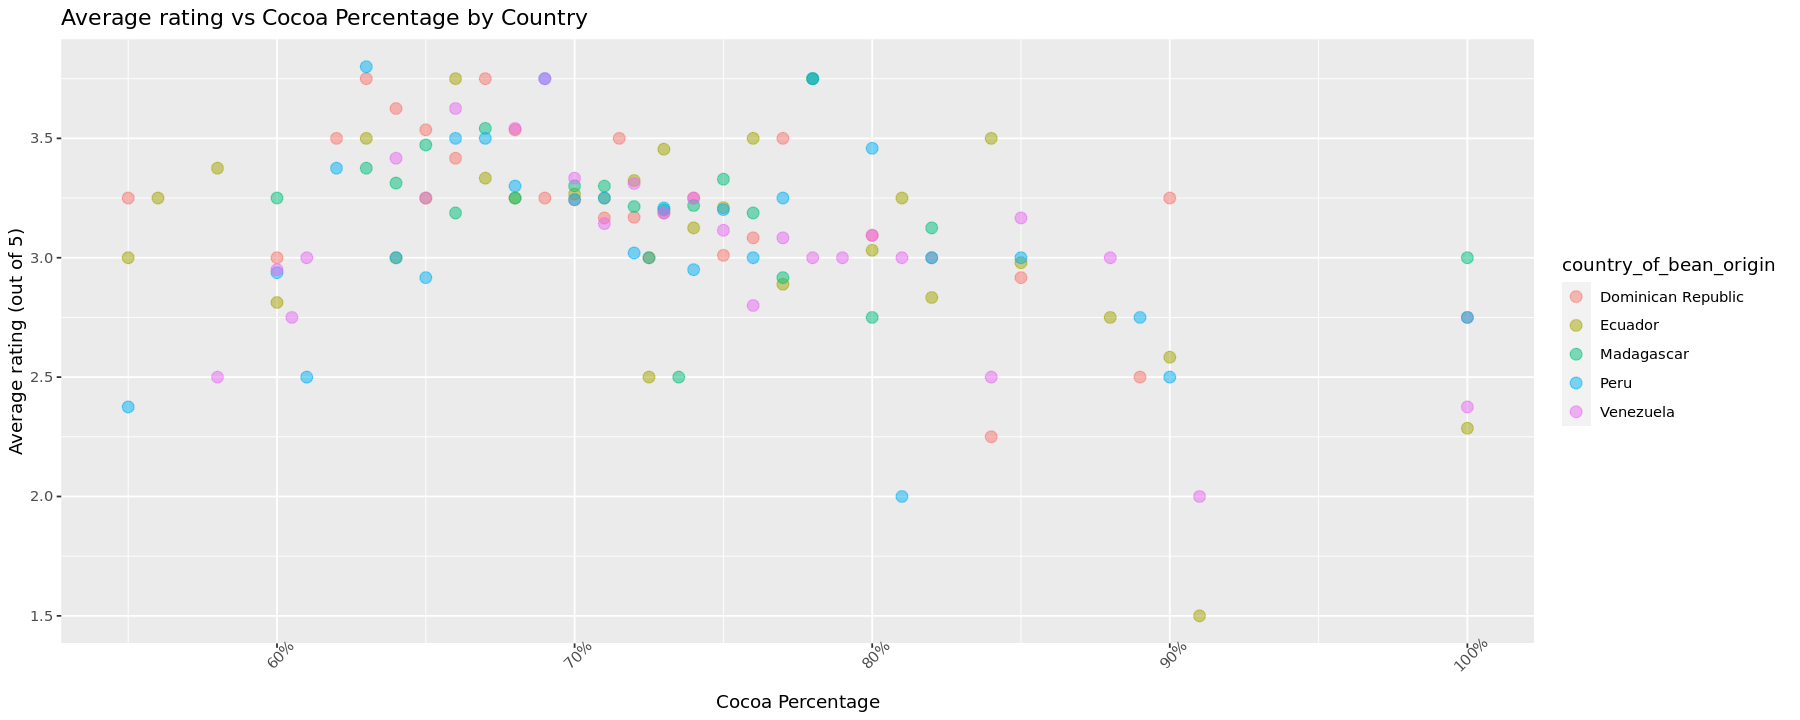

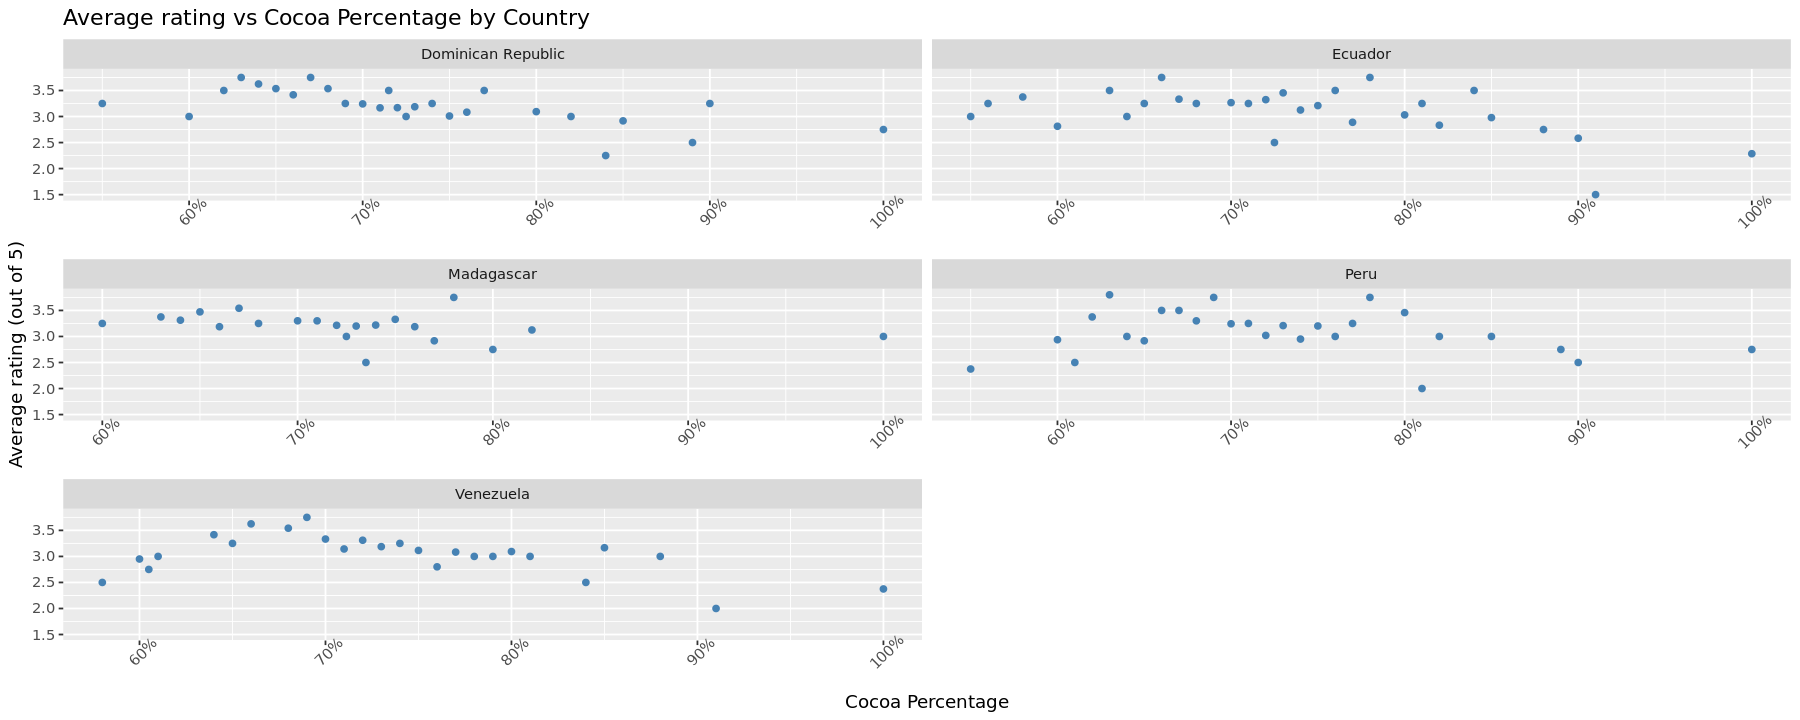

In [16]:
top5choc = chocolate |>
    group_by(country_of_bean_origin) |>
    summarize(count=n()) |>
    slice_max(order_by = count, n = 5) |>
    pull(country_of_bean_origin)
top5choc 


choc2 = chocolate |>
    filter(country_of_bean_origin %in% top5choc) |>
    group_by(country_of_bean_origin, cocoa_percent) |>
    summarize(rating_avg = sum(rating, na.rm=TRUE)/n(), .groups = 'drop')

options(repr.plot.width = 15, repr.plot.height=6)
q=ggplot(choc2, aes(x=cocoa_percent, y=rating_avg, color = country_of_bean_origin)) + geom_point(size=3, alpha = 0.5) + theme(axis.text.x = element_text(angle = 45)) +
labs(x= "Cocoa Percentage", y = "Average rating (out of 5)", title = "Average rating vs Cocoa Percentage by Country") + scale_x_continuous(labels = scales::percent_format(scale=1))

q

p=ggplot(choc2, aes(x=cocoa_percent, y=rating_avg)) + geom_point(color='steelblue') + facet_wrap(~country_of_bean_origin, nrow=4, scales = 'free_x')+
    theme(axis.text.x = element_text(angle = 45)) + labs(x= "Cocoa Percentage", y = "Average rating (out of 5)", title = "Average rating vs Cocoa Percentage by Country")+
    scale_x_continuous(labels = scales::percent_format(scale=1))
p



# Flavors of Cacao: Chocolate Analysis

For my data analysis, I decided to use the dataset on Tidy Tuesday from the Flavors of Cocao chocolate bar ratings database. This database has reviews for over 2,600 plain dark chocolate bars. The variables I chose to focus on were country of bean origin, rating on a scale of 1-5, and cocoa percentage per chocolate bar. To begin, I wanted to narrow down the countries of bean origin I was looking at to see what the top 10 countries were in this dataset. I captured these results in a tibble which was sorted from most to least observations. Venezuela was the leading country of bean origin for chocolate bars in this dataset, with 253 chocolate bars. Peru, Dominican Republic, and Ecuador were not far behind, also having at least 200 chocolate bars present in the database. I then decided to narrow my analysis further to look at the top 8 countries in the dataset and their average chocolate bar ratings, plotting the countries in reverse alphabetical order. When I put these results into a bar chart, it was apparent that they all had similar average ratings, around 3.25. There was no clear country of bean origin that had higher rated chocolate bars by a wide marigin, but chocolate bars with a blend of beans had the lowest average rating and those with beans from Madagascar had the highest rating.

I then narrowed my analysis to the top 5 countries. I wanted to explore the relationship between cocoa percentage and average ratings, and I did this in two different ways. In my first graphic, I plotted cocoa percentage vs average ratings on one graph, and altered the default encodings so that the color of each point correlated to the country of bean origin. This allowed me to see how different countries rated on the same cocoa percentages. Some notable findings on this graph were that Ecuador has the lowest overall rating, with a 1.5 on a chocolate bar that has over 90% cocoa. The highest overall rating was claimed by Peru, with a bar at about 63% cocoa. Each country has similar ratings for each percentage, with the most variation occuring at the extreme ends of cocoa percentage. I then wanted to create separate plots by country of bean origin to have a clearer visual of the patterns by country. Here, you can clearly see the lowest rating by percentage in each country. The overall trends by country look similar, with the highest ratings being on chocolate bars with around 65%-75% cocoa, and the lowest ratings on bars with around 90% cocoa. You can also see how country of bean origin correlates to how many bars produced of each cocoa percentage there are. For example, Madagascar lacks a lot of observations after cocoa percentage reaches 80, while the other countries drop off after 90%. This might inform us on why chocolate bars with beans from Madagascar had a slightly higher overall average rating, because there aren't as many chocolate bars with higher cocoa percentages, which tend to rank lower.